#### Data

* Fuel consumption and CO_2 emission

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

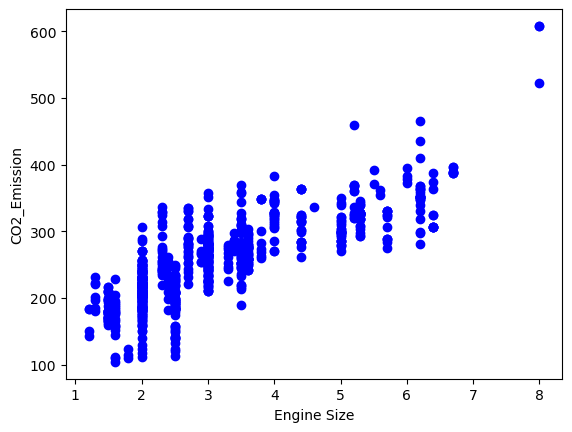

In [3]:


df = pd.read_csv("D:\Sajjad Ahmad\Jupyter Projects\QML\Fuel Consumption Ratings.csv", encoding = 'latin-1')

'Taking a look at the data'
# df.head()

'Describing data'
# df.describe()

'Selecting some features'
cdf = df[['Engine_Size', 'CO2_Emissions']]

# cdf.head(10)



"""
Drawing a scatter plot:
1. Engine Size Vs Emission of CO2

"""

plt.scatter(cdf.Engine_Size, cdf.CO2_Emissions, color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2_Emission')
plt.show()

* Dataset 

<h1 align='center'><font size=2> \begin{equation} data = \begin{bmatrix}
X ~~(Engine~~ Size) \\
Y ~~(CO2~~ Emission)
\end{bmatrix} \end{equation}  </font></h1>

* The hypothesis function:

<h1 align='center'><font size=3>$h(\theta) = \theta_0 + \theta_1 X$ </font></h1> ; $\theta_0$ is the initial value

* Mean square error (MQE) function:
<h1 align='center'><font size=3>$C(\theta) = \frac{1}{2m} \left( h(\theta) - Y \right)^{2}$ </font></h1> ; where m is the number of examples

By putting the hypothesis function above function the MSE func will be

<h1 align='center'><font size=3>$C(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left(\theta_0 + \theta_1 x^i - y^i \right)^{2}$ </font></h1>

This function will be used as a cost function to be minimized for the value of $\theta$ using gradient descent method


#### Gradient descent

<h1 align='center'><font size=3>$ \theta (n+1) = \theta(n) - \alpha \nabla C(\theta)$ </font></h1>

<h1 align='center'><font size=3>$  \nabla C(\theta) = \begin{bmatrix} \frac{\partial C}{\partial \theta_0} \\
\frac{\partial C}{\partial \theta_1}  \end{bmatrix}$ </font></h1>

<h1 align='center'><font size=3>$  \nabla C(\theta) = \begin{bmatrix} \frac{1}{m} \sum_{i=1}^{m} \left(\theta_0 + \theta_1 x^i - y^i \right) \\
\frac{1}{m} \sum_{i=1}^{m} \left(\theta_0 + \theta_1 x^i - y^i \right)\theta_1  \end{bmatrix}$ </font></h1>

##### Splitting the dataset

* Splitting dataset into train and test sets: 80% data for training and 20% for testing

In [54]:
'Splitting dataset into train and test sets: 80% data for training and 20% for testing'
msk = np.random.rand(len(df)) < 0.8   #it creates an array of Boleans True and False of the length of data set
train = cdf[msk]
test = cdf[~msk]

train_x = np.asanyarray(train[['Engine_Size']])
train_y = np.asanyarray(train[['CO2_Emissions']])

test_x = np.asanyarray(test[['Engine_Size']])
test_y = np.asanyarray(test[['CO2_Emissions']])

##### Traing using Gradient descent

In [70]:
def gradient(train_x, train_y,theta):
    m = len(train_x)
    grad = []
    grad_0 = 0
    grad_1 = 0
    for i in range(m):
        grad_0 += 1/m * (theta[0] + theta[1]*train_x[i][0] - train_y[i][0])
        grad_1 += 1/m * (theta[0] + theta[1]*train_x[i][0] - train_y[i][0])*theta[1]
    
    grad.append(grad_0)
    grad.append(grad_1)
    
    return grad    
        

In [73]:
def update_theta(grad, theta, lr, tol):
    theta0 = 0
    theta1 = 0
    for j in range(5000):
        if grad[0] == tol and grad[1] == tol:
            break
        else:
            theta0 = theta[0] - lr*grad[0]
            theta1 = theta[1] - lr*grad[1]
    
    return f"theta0 = {theta0}, theta1 = {theta1}"

##### Calling the gradient and theta function

In [74]:
tol=1e-6
lr = 0.5
theta = np.array([0.5, 0.9])
grad = gradient(train_x, train_y, theta)
update_theta(grad, theta, lr, tol)

'theta0 = 127.43698484848491, theta1 = 115.14328636363639'

##### Testing

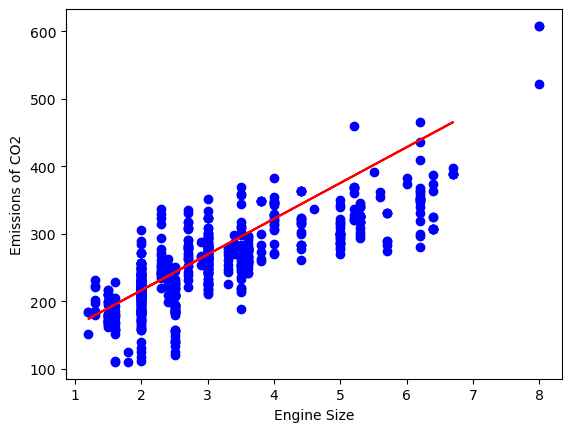

In [75]:
result_y = []
for i in range(len(test_x)):
    result_y.append(110.28 + 53.01*test_x[i][0])

'Ploting traing data'
plt.scatter(train.Engine_Size, train.CO2_Emissions, color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('Emissions of CO2')



plt.plot(test_x, result_y, '-r')
plt.show()

In [18]:
!git pull origin main

Already up to date.


From https://github.com/Sajjad-Ahmad-phy/Final-Year-Project
 * branch            main       -> FETCH_HEAD


In [19]:
!git add .
!git commit -m "Your commit message"

[main 36d100c] Your commit message
 5 files changed, 567 insertions(+), 43 deletions(-)
 create mode 100644 .ipynb_checkpoints/Training a simple linear regression ML model-checkpoint.ipynb
 create mode 100644 1
 create mode 100644 Training a simple linear regression ML model.ipynb


In [20]:
!git push -u origin main

branch 'main' set up to track 'origin/main'.

To https://github.com/Sajjad-Ahmad-phy/Final-Year-Project.git
   db56043..36d100c  main -> main
